In [1]:
import sys
sys.path.append('/home/painchess/clean_merger_rate')
from simulation import *
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import os
from matplotlib import ticker

In [17]:
sim_names = ['M25S07', 'M25S08', 'M25S09', 'M03S07', 'M03S08', 'M03S09', 'M35S07', 'M35S08', 'M35S09',
                 'Illustris', 'BolshoiP', 'Bolshoi', 'M03S08b', 'm25s85', 'm2s8', 'm4s7', 'm4s8', 'm2s9',
                 'm3s8_50', 'm3s8', 'm35s75', 'm4s9', 'm3s9', 'm25s75', 'm2s1', 'm3s7', 'm3s85', 'm2s7', 'm25s8',
                 'm35s8', 'm25s9', 'm35s85', 'm3s75', 'm35s9', 'm35s7']
omegas = [0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.35, 0.309, 0.307, 0.27, 0.3, 0.25, 0.2, 0.4, 0.4, 0.2, 0.3
    , 0.3, 0.35, 0.4, 0.3, 0.25, 0.2, 0.3, 0.3, 0.2, 0.25, 0.35, 0.25, 0.35, 0.3, 0.35, 0.35]
sigmas = [0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.816, 0.82, 0.82, 0.8, 0.85, 0.8, 0.7, 0.8, 0.9, 0.8
    , 0.8, 0.75, 0.9, 0.9, 0.75, 1.0, 0.7, 0.85, 0.7, 0.8, 0.8, 0.9, 0.85, 0.75, 0.9, 0.7]

sims = dict(zip(sim_names, list(zip(omegas, sigmas))))

In [2]:
path = '/home/painchess/YubaHDD6T/oldsims/'
sim1 = Simulation('M03S08', 0.3, 0.8, path)
rd = sim1.get_redshifts()

In [3]:
zxt, zmmt, mofzt, otht = sim1.make_zxs(z=0, save=False, snapnums=[5, 10, 15])

/home/painchess/clean_merger_rate/simulation.py:17: RuntimeWarning: overflow encountered in power
  return (1 + z) ** beta * np.exp(-gamma * z)
/home/painchess/clean_merger_rate/simulation.py:17: RuntimeWarning: invalid value encountered in multiply
  return (1 + z) ** beta * np.exp(-gamma * z)


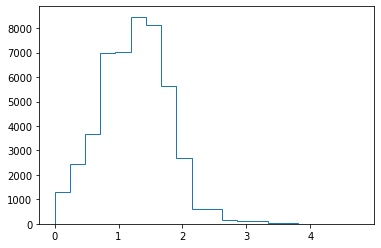

In [7]:
h = plt.hist(zxt['z50'][zxt['z50']<10], histtype='step', bins=20)

## z50 distributions 

/home/painchess/clean_merger_rate/simulation.py:17: RuntimeWarning: overflow encountered in power
  return (1 + z) ** beta * np.exp(-gamma * z)
/home/painchess/clean_merger_rate/simulation.py:17: RuntimeWarning: invalid value encountered in multiply
  return (1 + z) ** beta * np.exp(-gamma * z)


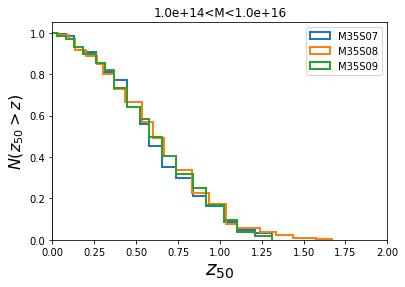

In [15]:
selec = ['M35S07', 'M35S08', 'M35S09']
path = '/home/painchess/YubaHDD6T/oldsims/'
nb=50
mmin, mmax = 1e14, 1e16
for i in range(len(selec)):
    sim = selec[i]
    sim1 = Simulation(sim, sims[sim][0], sims[sim][1], path)
    zxt, _, _, oth = sim1.make_zxs(z=0, save=True, snapnums=[10])
    sel = zxt['z50'][(oth['Mass']<mmax)*(oth['Mass']>mmin)]
    plt.hist(sel[sel<5], linestyle = '-', color ='C{}'.format(i), density=True, cumulative=-1, histtype='step', linewidth=2, bins=nb, label=sim)

plt.xlim(0, 2)
plt.xlabel('$z_{50}$', size=20)
plt.ylabel('$N(z_{50}>z)$', size=16)
plt.title('{:2.1e}<M<{:2.1e}'.format(mmin, mmax), size=12)
plt.legend()
#plt.savefig('nmono_z50_basic_{:2.1e}<M<{:2.1e}.png'.format(Mmin, Mmax), dpi=150, bbox_inches='tight')

/home/painchess/clean_merger_rate/simulation.py:17: RuntimeWarning: overflow encountered in power
  return (1 + z) ** beta * np.exp(-gamma * z)
/home/painchess/clean_merger_rate/simulation.py:17: RuntimeWarning: invalid value encountered in multiply
  return (1 + z) ** beta * np.exp(-gamma * z)
/home/painchess/clean_merger_rate/simulation.py:17: RuntimeWarning: overflow encountered in power
  return (1 + z) ** beta * np.exp(-gamma * z)
/home/painchess/clean_merger_rate/simulation.py:17: RuntimeWarning: invalid value encountered in multiply
  return (1 + z) ** beta * np.exp(-gamma * z)
/home/painchess/clean_merger_rate/simulation.py:17: RuntimeWarning: overflow encountered in exp
  return (1 + z) ** beta * np.exp(-gamma * z)
/home/painchess/clean_merger_rate/simulation.py:17: RuntimeWarning: overflow encountered in multiply
  return (1 + z) ** beta * np.exp(-gamma * z)
/tmp/ipykernel_9011/4020721358.py:9: UserWarning: evaluating in Python space because the '*' operator is not supported 

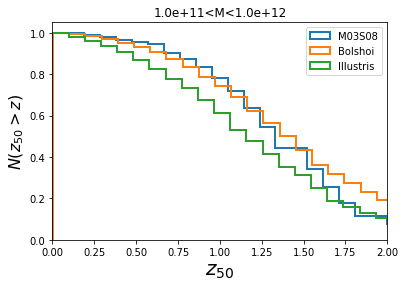

In [18]:
selec = ['M03S08', 'Bolshoi', 'Illustris']
path = '/home/painchess/YubaHDD6T/oldsims/'
nb=50
mmin, mmax = 1e11, 1e12
for i in range(len(selec)):
    sim = selec[i]
    sim1 = Simulation(sim, sims[sim][0], sims[sim][1], path)
    zxt, _, _, oth = sim1.make_zxs(z=0, save=True, snapnums=[10])
    sel = zxt['z50'][(oth['Mass']<mmax)*(oth['Mass']>mmin)]
    plt.hist(sel[sel<5], linestyle = '-', color ='C{}'.format(i), density=True, cumulative=-1, histtype='step', linewidth=2, bins=nb, label=sim)

plt.xlim(0, 2)
plt.xlabel('$z_{50}$', size=20)
plt.ylabel('$N(z_{50}>z)$', size=16)
plt.title('{:2.1e}<M<{:2.1e}'.format(mmin, mmax), size=12)
plt.legend()
#plt.savefig('nmono_z50_basic_{:2.1e}<M<{:2.1e}.png'.format(Mmin, Mmax), dpi=150, bbox_inches='tight')